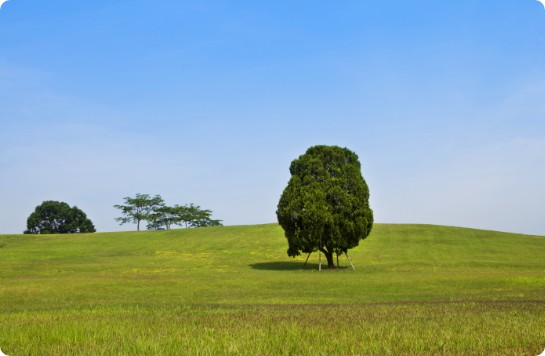

In [37]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image

image = cv2.imread('/content/tree.jpeg')
cv2_imshow(image)


In [5]:
print(image[0,0].shape)
print(image[0,0])
print(image[180,455])

(3,)
[250 254 255]
[227 208 193]


In [6]:
def slicing_test():
    array = np.array(range(0,100))
    print(array)
    cut = array[10:20]
    print(cut)

def slicing_test2():
  array = np.array([[1,2,3,4],
                    [5,6,7,8],
                    [9,10,11,12],
                    [13,14,15,16]])
  print(array)
  cut = array[1:3, 1:3]
  print(cut)

image and emoji data had been succesfully uploaded
(210, 360, 4)
(50, 80, 3)
-- 642
image_output shape : (712, 545, 3)
image_bg shape : (50, 80, 3)
blend_ shape : (50, 80, 3)
(712, 545, 3)


<ipython-input-55-e6a6ad902bcc>:107: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if image == "" or emoji == "":


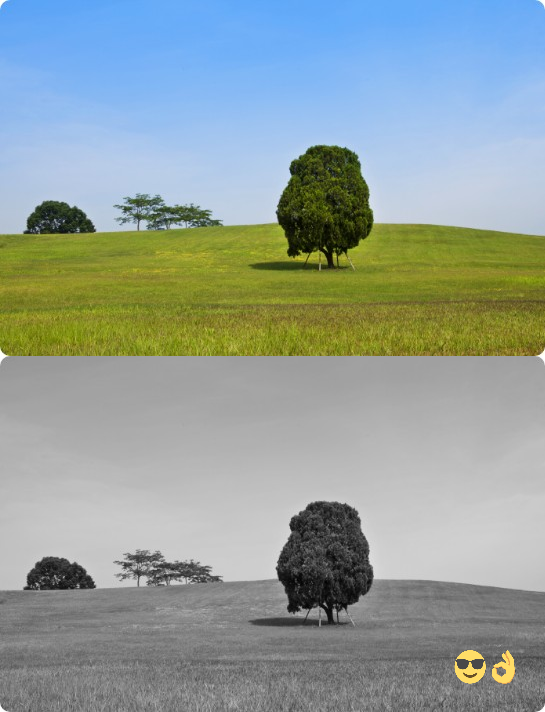

In [55]:
def crop():
  image = cv2.imread('/content/tree.jpeg')
  cropped = image[100:350, 100:300]
  print('origin size', image.shape, 'cropped size', cropped.shape)
  cv2_imshow(image)
  cv2_imshow(cropped)

def merge(image, gray_image):
  out = np.vstack([image, gray_image])
  # cv2_imshow(out)
  return out
  # out2 = np.vstack([out, out])
  # cv2_imshow(out2)

def paste():
  image = cv2.imread('/content/tree.jpeg')
  watermark_image = cv2.imread('/content/watermark.png')
  crop_watermark = watermark_image[25:275, 225:425]
  image[100:350, 100:300] = crop_watermark
  cv2_imshow(image)

def vertical_stack(image1, image2):
  stack = np.vstack([image1, image2])
  print(stack)

def convert_gray_scale(image):
  original_image = image
  original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
  gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
  gray_image_3d = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
  # cv2_imshow(gray_image)

  return gray_image_3d

# def alpha_blending_simple(image, emoji):
#   # image = cv2.imread('/content/tree.jpeg')
#   # emoji = cv2.imread('/content/watermark.png', cv2.IMREAD_UNCHANGED)
#   alpha = emoji[:,:, 3]
#   emoji_bgr = emoji[:,:, :3]

#   h, w, _ = emoji.shape
#   pos_y = emoji_bgr.shape[0] - h -10
#   pos_x = 10
#   # cv2_imshow(np.array(255 - alpha, dtype=np.uint8))

#   #alpha make [h, w, 3] and 0 - 1
  
#   alpha = cv2.cvtColor(alpha, cv2.COLOR_GRAY2BGR)
#   alpha = alpha / 255

#   output = np.array(image)
#   bg = output[pos_y:pos_y + h, pos_x:pos_x + w]
#   # cv2_imshow(bg)

#   # cv2_imshow(np.array((emoji_bgr * alpha), np.uint8))
#   # cv2_imshow(np.array(bg * (1- alpha), np.uint8))
#   blend = (emoji_bgr * alpha) + bg * (1 - alpha)
#   # cv2_imshow(np.array(blend, dtype = np.uint8))

  
#   output[pos_y:pos_y + h, pos_x:pos_x + w] = (emoji_bgr * alpha) + bg * (1 - alpha)

#   # cv2_imshow(emoji)
#   # cv2_imshow(alpha)
#   # cv2_imshow(image)
#   cv2_imshow(output)
#   return output

def alpha_blending_simple(image, emoji):
  alpha = emoji[:,:, 3] #알파채널만을 선택
  emoji_bgr = emoji[:,:,:3] #0~3의 BGR 채널 선택

  h, w, _ = emoji.shape
  print(emoji_bgr.shape)
  # print(alpha.shape)
 
  # h, w, _ = h-10, w-10, _
  pos_y = image.shape[0] - h - 20   # Set manually
  print("--",pos_y)
  pos_x = image.shape[1] - w - 20 # Set manually

  #alpha make [h, w, 3] and 0 - 1
  alpha = cv2.cvtColor(alpha, cv2.COLOR_GRAY2BGR)
  alpha = alpha / 255



  output = np.array(image)
  print("image_output shape :",output.shape)

  bg = output[pos_y:pos_y + h, pos_x:pos_x + w]
  print("image_bg shape :",bg.shape)
  blend = (emoji_bgr * alpha) + bg * (1 - alpha)
  print("blend_ shape :",blend.shape)
  output[pos_y:pos_y + h, pos_x:pos_x + w] = blend
  print(output.shape)
  cv2_imshow(output)
  return output

def resize_image(input_emoji):
    height, width = input_emoji.shape[:2]
    resized_image = cv2.resize(input_emoji, (80,50))

    return resized_image

def error_handling(image, emoji):
  if image == "" or emoji == "":
    raise ValueError("Please input right image path")
  else:
    print("image and emoji data had been succesfully uploaded")

if __name__ == '__main__':
  image = cv2.imread('/content/tree.jpeg')
  emoji = cv2.imread('/content/watermark.png', cv2.IMREAD_UNCHANGED)
  # image = ""
  error_handling(image, emoji)
  print(emoji.shape)
  emoji = resize_image(emoji)
  gray_image = convert_gray_scale(image)
  merged_image = merge(image, gray_image)
  alpha_result = alpha_blending_simple(merged_image, emoji)

